## Bagging polynomial models

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sn
sn.set(style='whitegrid')
rng = np.random.RandomState(0)

Text(0, 0.5, 'Y')

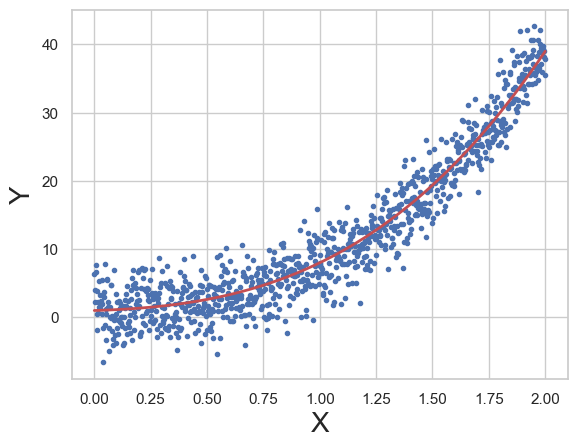

In [2]:
N=1000
X = np.linspace(0, 2, N).reshape(N,1) 
Y_best = 1 + X + 3*X**2 + 3*X**3
Y = Y_best + 3*rng.randn(N, 1) # change to 10
#show
fig, ax = plt.subplots()
ax.plot(X, Y,'.')
#try this
ax.plot(X, Y_best,'-r', linewidth=2)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)

Text(0.5, 1.0, 'degree=22, MSE=8.432037')

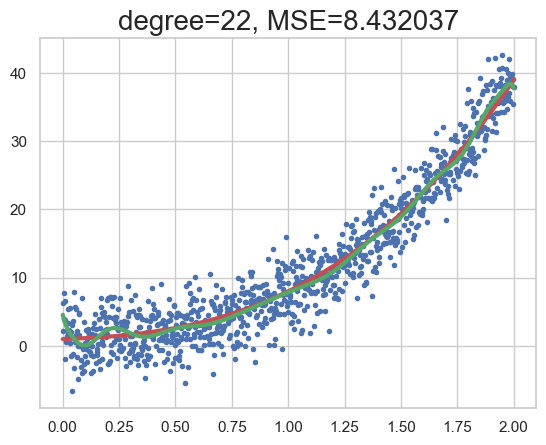

In [3]:
deg= 22
model = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression())
model.fit(X, Y)           
Yp = model.predict(X)
MSE = np.mean((Y-Yp)**2)
MSE = '{:6f}'.format(MSE)
plt.plot(X, Y,'.b')
plt.plot(X, Y_best,'-r', linewidth=3)
plt.plot(X, Yp, '-g', linewidth=3)
plt.title('degree='+str(deg)+', MSE='+str(MSE), fontsize=20)

In [4]:
idxlist = np.arange(0, N,1)
M=100
model_list=[]
for n in range(0, M):
    rng.shuffle(idxlist)
    Xn = X[idxlist[0:int(N*0.6)],:]
    Yn = Y[idxlist[0:int(N*0.6)],:]
    model = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression())
    model.fit(Xn, Yn)    
    model_list.append(model)
print('len(model_list) = ', len(model_list))

len(model_list) =  100


In [5]:
Yp=np.zeros((len(model_list),N))
for n in range(0, len(model_list)):    
    model = model_list[n]
    Yp[n,:] = model.predict(X).reshape(N)   
Yp.shape

(100, 1000)

Text(0.5, 1.0, 'degree=22, MSE=8.433459')

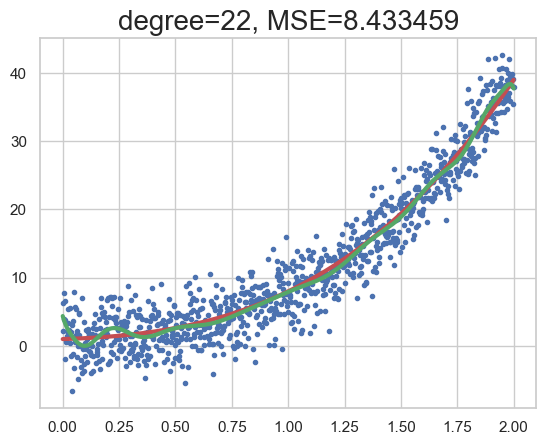

In [6]:
Yp_avg = np.mean(Yp, axis=0).reshape(N,1)
MSE = np.mean((Y-Yp_avg)**2)
MSE = '{:6f}'.format(MSE)
plt.plot(X, Y,'.b')
plt.plot(X, Y_best,'-r', linewidth=3)
plt.plot(X, Yp_avg, '-g', linewidth=3)
plt.title('degree='+str(deg)+', MSE='+str(MSE), fontsize=20)

a simple averging does not help, why ? <br>
Let's check the correlation between the outputs from the 100 models

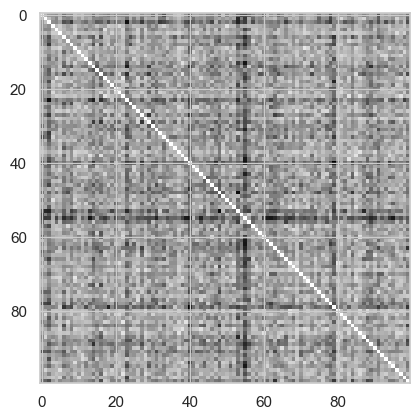

In [7]:
C=np.corrcoef(Yp)
plt.imshow(C, cmap='gray')

In [8]:
C.min()

0.9976457146921407